In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,Male,USA,True,NaN,99.0,BabyCare,Cash,Offline
1,2,44.0,NaN,Russia,False,463034.0,21.0,BabyCare,Bank Transfer,NaN
2,3,900.0,Female,India,True,402865.0,31.0,Medical,UPI,Offline
3,4,46.0,NaN,USA,True,NaN,21.0,BabyCare,UPI,Offline
4,5,19.0,Female,Australia,True,221868.0,45.0,Medical,Bank Transfer,Online


In [4]:
df[df['Age'] > 100] = np.nan

In [5]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1.0,37.0,Male,USA,True,NaN,99.0,BabyCare,Cash,Offline
1,2.0,44.0,NaN,Russia,False,463034.0,21.0,BabyCare,Bank Transfer,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,46.0,NaN,USA,True,NaN,21.0,BabyCare,UPI,Offline
4,5.0,19.0,Female,Australia,True,221868.0,45.0,Medical,Bank Transfer,Online


In [6]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Employed'] = df['Employed'].fillna(df['Employed'].mode()[0])
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['ItemsPurchased(monthly)'] = df['ItemsPurchased(monthly)'].fillna(int(df['ItemsPurchased(monthly)'].mean()))
df['ProductType'] = df['ProductType'].fillna(df['ProductType'].mode()[0])
df['PaymentType'] = df['PaymentType'].fillna(df['PaymentType'].mode()[0])
df['Mode'] = df['Mode'].fillna(df['Mode'].mode()[0])

In [7]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1.0,37.0,Male,USA,True,239796.840909,99.0,BabyCare,Cash,Offline
1,2.0,44.0,Male,Russia,False,463034.000000,21.0,BabyCare,Bank Transfer,Online
2,NaN,50.0,Male,Australia,False,239796.840909,50.0,BabyCare,UPI,Online
3,4.0,46.0,Male,USA,True,239796.840909,21.0,BabyCare,UPI,Offline
4,5.0,19.0,Female,Australia,True,221868.000000,45.0,Medical,Bank Transfer,Online


In [11]:
df = df.drop(['CustID'],axis = 1)

In [12]:
df.head()

,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,37.0,Male,USA,True,239796.840909,99.0,BabyCare,Cash,Offline
1,44.0,Male,Russia,False,463034.000000,21.0,BabyCare,Bank Transfer,Online
2,50.0,Male,Australia,False,239796.840909,50.0,BabyCare,UPI,Online
3,46.0,Male,USA,True,239796.840909,21.0,BabyCare,UPI,Offline
4,19.0,Female,Australia,True,221868.000000,45.0,Medical,Bank Transfer,Online


In [19]:
df[['Gender','Country','Employed','ProductType','PaymentType','Mode']] = df[['Gender','Country','Employed','ProductType','PaymentType','Mode']]
X = df[['Age','Gender','Income','ItemsPurchased(monthly)']].apply(LabelEncoder().fit_transform)
y = df['Mode']

In [20]:
kmeans = KMeans(n_clusters=2)

In [21]:
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

In [22]:
df.head()

,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode,Cluster
0,37.0,Male,USA,True,239796.840909,99.0,BabyCare,Cash,Offline,1
1,44.0,Male,Russia,False,463034.000000,21.0,BabyCare,Bank Transfer,Online,1
2,50.0,Male,Australia,False,239796.840909,50.0,BabyCare,UPI,Online,1
3,46.0,Male,USA,True,239796.840909,21.0,BabyCare,UPI,Offline,0
4,19.0,Female,Australia,True,221868.000000,45.0,Medical,Bank Transfer,Online,0


<ipython-input-25-c64fdbcf0aa5>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X.iloc[:,3],X.iloc[:,2],X.iloc[:,0],c=labels.astype(np.float),edgecolor="k")


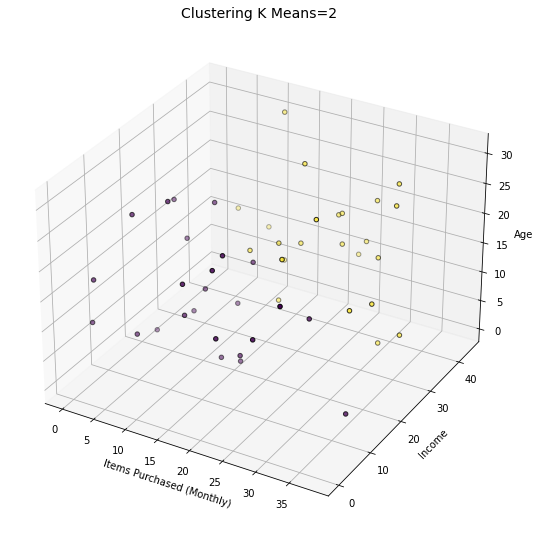

In [25]:
labels = kmeans.labels_
fig = plt.figure(1,figsize=(7,7))
ax = Axes3D(fig)
ax.scatter(X.iloc[:,3],X.iloc[:,2],X.iloc[:,0],c=labels.astype(np.float),edgecolor="k")
ax.set_xlabel("Items Purchased (Monthly)")
ax.set_ylabel("Income")
ax.set_zlabel("Age")
plt.title("Clustering K Means=2",fontsize=14)
plt.show()

In [32]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=50,n_features=2,centers=3)

In [33]:
df1 = pd.DataFrame(X)

In [34]:
df1.head()

,0,1
0,5.707207,0.148483
1,4.883833,7.498460
2,6.078309,6.304755
3,6.557334,-0.096023
4,3.431652,7.259754


<AxesSubplot:xlabel='0', ylabel='0'>

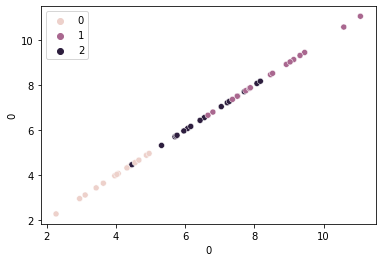

In [37]:
sns.scatterplot(x=df1[0],y=df1[0],hue=y)